# Importing libraries

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# For fulldataset


In [2]:
d1=pd.read_csv('datasets//full_dataset//goemotions_3.csv')
d2=pd.read_csv('datasets//full_dataset//goemotions_2.csv')
d3=pd.read_csv('datasets//full_dataset//goemotions_1.csv')


In [3]:
d=pd.concat([d1,d2,d3])

In [4]:
# d.info()

In [5]:
df1=d[['text','disgust']]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211225 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     211225 non-null  object
 1   disgust  211225 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ MB


In [7]:
df1=df1[df1['disgust']==1]

In [8]:
df1.rename(columns={'text':'Text','disgust':'Emotion'},inplace='True')

In [9]:
df1.tail()

,Text,Emotion
69769,"Yeeeaaahhh.... ""protect""... I'm pretty sure th...",1
69778,Sounds weird but dont swallow,1
69788,[NAME] can’t space and [NAME] is getting worse...,1
69915,"That sounds awful. Glad its from 4Chan, so I k...",1
69984,Is it weird that I was practically drooling wh...,1


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5301 entries, 4 to 69984
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     5301 non-null   object
 1   Emotion  5301 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.2+ KB


In [11]:
df1.Emotion[df1.Emotion==1] = 'disgust'

C:\Users\dongo\AppData\Local\Temp\ipykernel_14496\664850388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Emotion[df1.Emotion==1] = 'disgust'


# For data 'emotion_dataset_2'

In [12]:
data=pd.read_csv('datasets//emotion_dataset_2.csv')

In [13]:
data.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [14]:
data.drop(columns=['Unnamed: 0','Clean_Text'],inplace=True)

In [15]:
emotion=['sadness','fear','anger','neutral','disgust']

In [16]:
data=data[data['Emotion'].isin(emotion)==True]

In [17]:
data.Emotion.value_counts()

sadness    6722
fear       5410
anger      4297
neutral    2254
disgust     856
Name: Emotion, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19539 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  19539 non-null  object
 1   Text     19539 non-null  object
dtypes: object(2)
memory usage: 457.9+ KB


# For data 'train.txt',test.txt and valid.txt

In [19]:
# Read datasets
df_train = pd.read_csv('datasets//train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('datasets//val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('datasets//test.txt', names=['Text', 'Emotion'], sep=';')

In [20]:
print(df_train)

                                                    Text  Emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]


In [21]:
#print the shape of the data set
print(df_train.shape)

(16000, 2)


In [22]:
#print first 5 rows
df_test.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [23]:
df=pd.concat([df_train,df_test,df_val])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     20000 non-null  object
 1   Emotion  20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


In [25]:
df.Emotion.value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

# For data tweet_emotions.csv

In [26]:
new_df=pd.read_csv('datasets//tweet_emotions.csv')

In [27]:
new_df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [28]:
new_df.drop('tweet_id',axis=1,inplace=True)

In [29]:
new_df.rename(columns={'sentiment':'Emotion','content':'Text'},inplace=True)

In [30]:
new_df.Emotion.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: Emotion, dtype: int64

# Merging all data

In [31]:
merged_df=pd.concat([df,new_df,data,df1])

In [32]:
merged_df.shape

(84840, 2)

In [33]:
merged_df.Emotion.value_counts()

sadness       17684
neutral       10892
worry          8459
fear           7783
anger          7116
joy            6761
disgust        6157
love           5483
happiness      5209
surprise       2906
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: Emotion, dtype: int64


# Cleaning merged data

In [34]:
emotions=['sadness','anger','fear','joy','neutral','happiness','relief','love','enthusiasm','worry','hate','disgust']

In [35]:
final_df=merged_df[merged_df.Emotion.isin(emotions)==True]

In [36]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79152 entries, 0 to 69984
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     79152 non-null  object
 1   Emotion  79152 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [37]:
final_df['Emotion'].replace(['sadness'], "sad", inplace=True)
final_df['Emotion'].replace(['happiness','love','joy'], "happy", inplace=True)
final_df['Emotion'].replace(['anger','hate'], "angry", inplace=True)
final_df['Emotion'].replace(['worry'], "fear", inplace=True)
final_df['Emotion'].replace(['enthusiasm','relief'], "neutral", inplace=True)



C:\Users\dongo\AppData\Local\Temp\ipykernel_14496\1348617185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Emotion'].replace(['sadness'], "sad", inplace=True)
C:\Users\dongo\AppData\Local\Temp\ipykernel_14496\1348617185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Emotion'].replace(['happiness','love','joy'], "happy", inplace=True)
C:\Users\dongo\AppData\Local\Temp\ipykernel_14496\1348617185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [38]:
final_df.Emotion.value_counts()

sad        17684
happy      17453
fear       16242
neutral    13177
angry       8439
disgust     6157
Name: Emotion, dtype: int64

In [39]:
#print the number of null values in each column
final_df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [40]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79152 entries, 0 to 69984
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     79152 non-null  object
 1   Emotion  79152 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [41]:
final_df['Text'].duplicated().value_counts()

False    74680
True      4472
Name: Text, dtype: int64

The data doesn't contains any null values

In [42]:
#print the number of duplicated values 
final_df.duplicated().sum()

4393

There is just one row which is duplicated but we need to check also if there are rows having the same text but different emotions

In [43]:
#removing duplicated values
index = final_df[final_df.duplicated() == True].index
final_df.drop(index, axis = 0, inplace = True)
final_df.reset_index(inplace=True, drop = True)

C:\Users\dongo\AppData\Local\Temp\ipykernel_14496\2884414561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(index, axis = 0, inplace = True)


In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69982 entries, 0 to 69981
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     69982 non-null  object
 1   Emotion  69982 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


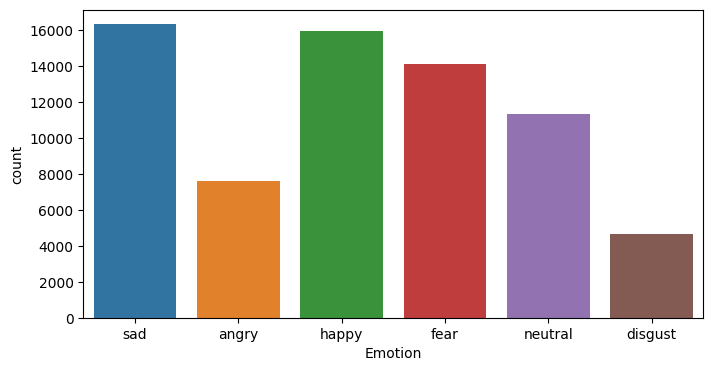

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=final_df);

In [46]:
#print the rows which are duplicated (duplicated in the text but with different emotions)
final_df[final_df['Text'].duplicated() == True]

,Text,Emotion
6009,i tend to stop breathing when i m feeling stre...,angry
6960,i was intensely conscious of how much cash i h...,sad
8895,i often find myself feeling assaulted by a mul...,sad
11984,i feel like a tortured artist when i talk to her,angry
13467,i resorted to yesterday the post peak day of i...,fear
...,...,...
61917,"Www , man !",sad
62554,I don't think you really want to hear about i...,sad
63435,Don't mixing #cosmetic brands. If it works fo...,neutral
64294,"Well , you always say you're busy .",sad


In [47]:
#print some of those rows to check
final_df[final_df['Text'] == final_df.iloc[42271]['Text']]

,Text,Emotion
42271,"@nimbupani Divya, thnx a lot. Bt IMO it won't ...",neutral


In [48]:
#removing duplicated text 
index = final_df[final_df['Text'].duplicated() == True].index
final_df.drop(index, axis = 0, inplace = True)
final_df.reset_index(inplace=True, drop = True)

C:\Users\dongo\AppData\Local\Temp\ipykernel_14496\834086814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(index, axis = 0, inplace = True)


In [49]:
#Count the number of stopwords in the data
temp =final_df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
# temp.stop_words.value_counts()

## Cleaning

In [50]:
final_df

,Text,Emotion
0,i didnt feel humiliated,sad
1,i can go from feeling so hopeless to so damned...,sad
2,im grabbing a minute to post i feel greedy wrong,angry
3,i am ever feeling nostalgic about the fireplac...,happy
4,i am feeling grouchy,angry
...,...,...
69911,Goddamnit [NAME] back at it again...,disgust
69912,Where’s the joke? I can’t even figure out why ...,disgust
69913,Who was it saying that [NAME] destroys hooker ...,disgust
69914,"Yeeeaaahhh.... ""protect""... I'm pretty sure th...",disgust


In [51]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    
    text = re.sub("_comma_", " ", text)
    
    text = re.sub("comma", "", text)
    text =  " ".join(text.split())
    
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

            
def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(str(text)))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

    

In [52]:
final_df= normalize_text(final_df)

C:\Users\dongo\AppData\Local\Temp\ipykernel_14496\11449722.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Text=df.Text.apply(lambda text : lower_case(str(text)))
C:\Users\dongo\AppData\Local\Temp\ipykernel_14496\11449722.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Text=df.Text.apply(lambda text : remove_stop_words(text))
C:\Users\dongo\AppData\Local\Temp\ipykernel_14496\11449722.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [53]:
final_df=final_df.drop_duplicates()

In [54]:
final_df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [55]:
final_df.to_csv('final_df.csv',index=False)

# Augment data

In [56]:
# !pip install nlpaug

In [57]:
import nlpaug
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

aug2 = naw.SynonymAug(aug_src='wordnet',aug_max=2)
# aug = naw.ContextualWordEmbsAug(aug_max=2)
# aug1 = nas.ContextualWordEmbsForSentenceAug()
aug_data=[]
emo=[]
def augment(df,emotion):
    for text in df['Text']:
#         print(text)    
        new=aug2.augment(str(text),n=1)
#         print(str(t))
        t=str(new).strip("[]")
        aug_data.append(str(t).strip("''"))
        emo.append(str(emotion))
    return (pd.DataFrame({'Text':aug_data,'Emotion':emo}))


#generate two data for one data
def augment2(df,emotion):
    for text in df['Text']:
#         print(text)    
        new=aug2.augment(str(text),n=2)
#         print(str(t))
#         t=str(new).strip("[]")
        aug_data.append(new[0])
        emo.append(str(emotion))
        aug_data.append(new[1])
        emo.append(str(emotion))
    return (pd.DataFrame({'Text':aug_data,'Emotion':emo}))

In [58]:
angry_data=final_df[final_df['Emotion']=='angry']
auf= augment(angry_data,'angry')

In [59]:
disgust_data=final_df[final_df['Emotion']=='disgust']
auf1= augment2(disgust_data,'disgust')

In [60]:
neutral_data=final_df[final_df['Emotion']=='neutral']

n_rows=neutral_data.shape[0]
random_indices = np.random.choice(n_rows, size=int(n_rows / 3), replace=False)
selected_rows = neutral_data.iloc[random_indices]

auf1= augment(selected_rows,'neutral')

In [61]:
final_df=pd.concat([final_df,auf1])

In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89598 entries, 0 to 20480
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     89598 non-null  object
 1   Emotion  89598 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [63]:
final_df.Emotion.value_counts()

sad        16187
happy      15855
angry      15026
neutral    14529
disgust    14004
fear       13997
Name: Emotion, dtype: int64

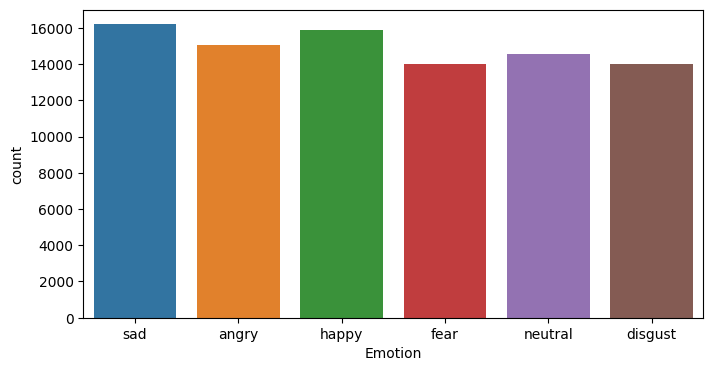

In [64]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=final_df);

In [65]:
label_map = {
    'sad': 0,
    'angry': 1,
    'fear':2,
    'happy':3,
    'neutral':4,
    'disgust':5
}

In [66]:
final_df['Emotion'] = final_df['Emotion'].map(label_map)

In [67]:
final_df

,Text,Emotion
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,1
3,ever feeling nostalgic fireplace know still pr...,3
4,feeling grouchy,1
...,...,...
20476,hair plough whiiite,4
20477,going bed bit need revisal moro,4
20478,decided the boot vista month hiatus spent two ...,4
20479,sure enough client service team member,4


In [68]:
final_df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [69]:
final_df=final_df.dropna()

In [70]:
final_df=final_df.drop_duplicates()

In [71]:
final_df.to_csv('FinalData.csv',index=False)